# TOPIC: EX 6.6:  Sourcing & Analyzing Time Series Data Using the Carbon Dioxide (CO2) Emmissions - Total Europe from quandl

## Task Contents


1. Importing your libraries and data

2. Subsetting, wrangling, and cleaning time-series data

3. Time series analysis: decomposition

4. Testing for stationarity

5. Stationarizing the Carbon Dioxide (CO2) Emmissions - Total Europe from quandl
https://data.nasdaq.com/data/BP-energy-production-and-consumption?page=2

- Install the Quandl library and register for a Quandl account as described in the Exercise.


- Find a data set to work and import it into your Jupyter notebook. Ensure that this data somehow connects to the broader research topic for your Achievement project. The best data set would be one that shares a common key with your main data set, such as a geographic component, so you can merge the data, but this could be difficult to find, so it’s not a requirement.


- Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.


- Create a line chart of your data.


- Decompose the data’s components.
Analyze the results from the plot in a markdown cell.


- Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.


- If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.


- If your data still isn’t stationary, perform another round of differencing and repeat step 6.


- Check your data’s autocorrelations.


- Save your Jupyter notebook and submit it to your tutor for review.
Bonus Task---check folder

### A. Sourcing & Analyzing Time-Series Data

### 1. Importing libraries and data 

(Install the Quandl library and register for a Quandl account)

In [115]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

### 2. Find a data set to work and import it into your Jupyter notebook

In [117]:
# Configured the API key 

quandl.ApiConfig.api_key = 'yxyXLSLizRs3N41sxH38'

In [118]:
# Importing the Carbon Dioxide (CO2) Emmissions - Total Europe from quandl.

df = quandl.get('BP/C02_EMMISSIONS_EUR')

In [119]:
df.head()

,Value
Date,
1965-12-31,3427.810483
1966-12-31,3474.885568
1967-12-31,3543.858134
1968-12-31,3757.726642
1969-12-31,4008.326486


In [120]:
df.tail()

,Value
Date,
2016-12-31,4260.801691
2017-12-31,4300.514656
2018-12-31,4251.018478
2019-12-31,4091.322028
2020-12-31,3596.825506


### Dataset contains yearly observation of CO2 emmissions for Euro from 1965 -2020.

In [121]:
df.shape

(56, 1)

In [122]:
df.columns

Index(['Value'], dtype='object')

In [123]:
type(df)

pandas.core.frame.DataFrame

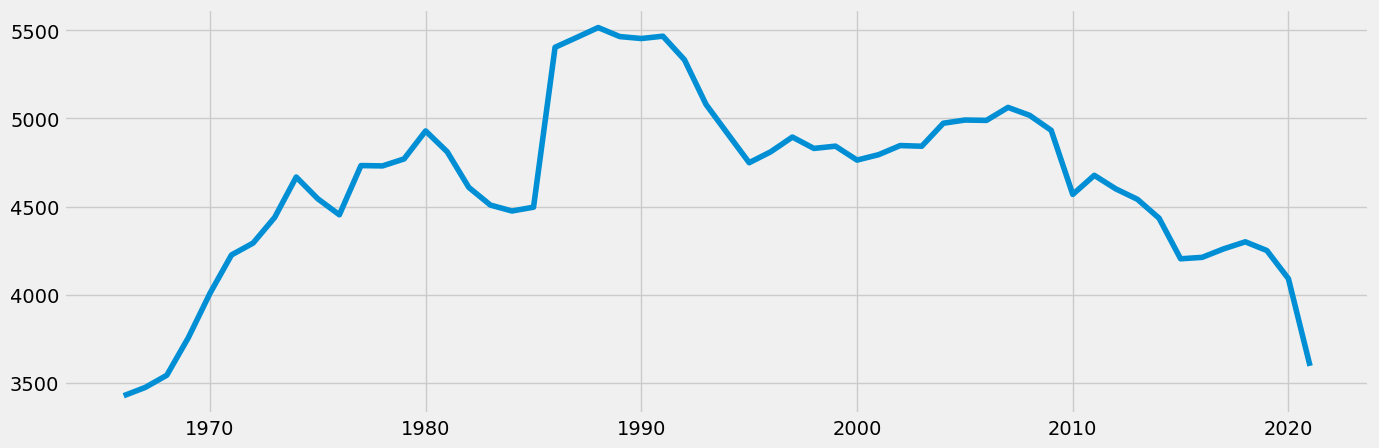

In [124]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,

# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

### 3. Subsetting, wrangling, and cleaning time-series data

#### I will subsett from from 1990 onwards because it was a mile stone in europe and the unification of germany the biggest economy. Also data does not contain any forecasting.

In [125]:
# Reset index so that you can use the "Date" column as a filter

df_2 = df.reset_index()

In [126]:
df_2.head()

,Date,Value
0,1965-12-31,3427.810483
1,1966-12-31,3474.885568
2,1967-12-31,3543.858134
3,1968-12-31,3757.726642
4,1969-12-31,4008.326486


In [127]:
df_sub = df_2.loc[(df_2['Date'] >= '1970-01-01')]

In [128]:
df_sub.shape

(51, 2)

In [129]:
# Set the "Date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Date']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,Value
datetime,
1970-12-31,4226.120880
1971-12-31,4293.235794
1972-12-31,4438.982691
1973-12-31,4667.719030
1974-12-31,4544.407876


### 4. Create a line chart of your data.

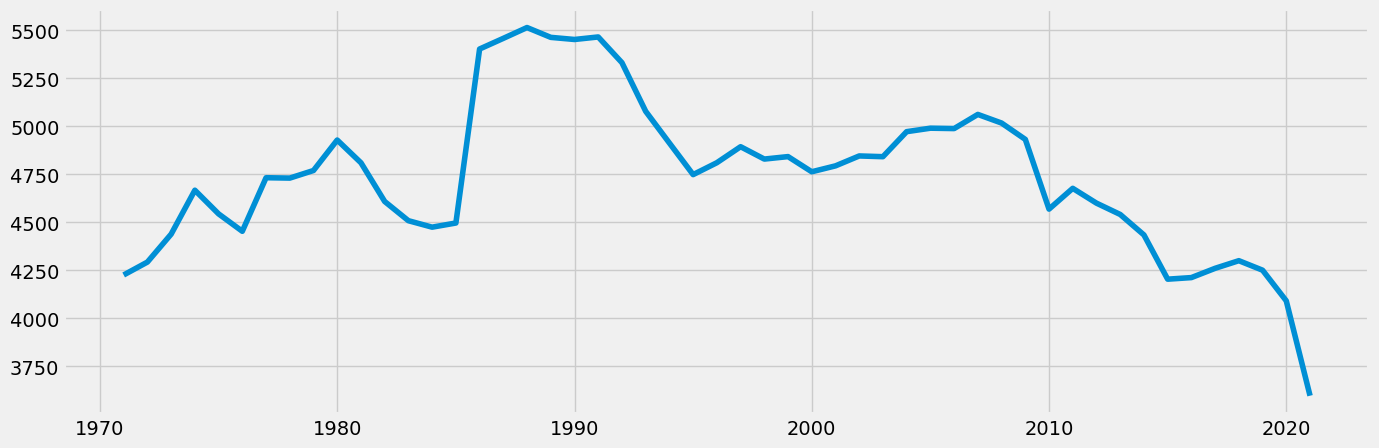

In [130]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_sub)

In [131]:
# Check for missing values 

df_sub.isnull().sum() # No missing values

Value    0
dtype: int64

In [132]:
# Check for duplicates

dups = df_sub.duplicated()
dups.sum()

# No duplicates

0

### 5. Time-series analysis: decomposition

#### Looking at the data pattern, I would guess that multiplicative model might be more appropriate to capture the non-linear behaviour in the data but I would like to try both model and see the difference there in.

#### 5.1 Decompotion: Additive Model method

In [133]:
# Decompose the time series using an additive model

decomposition_addition = sm.tsa.seasonal_decompose(df_sub, model='additive') 

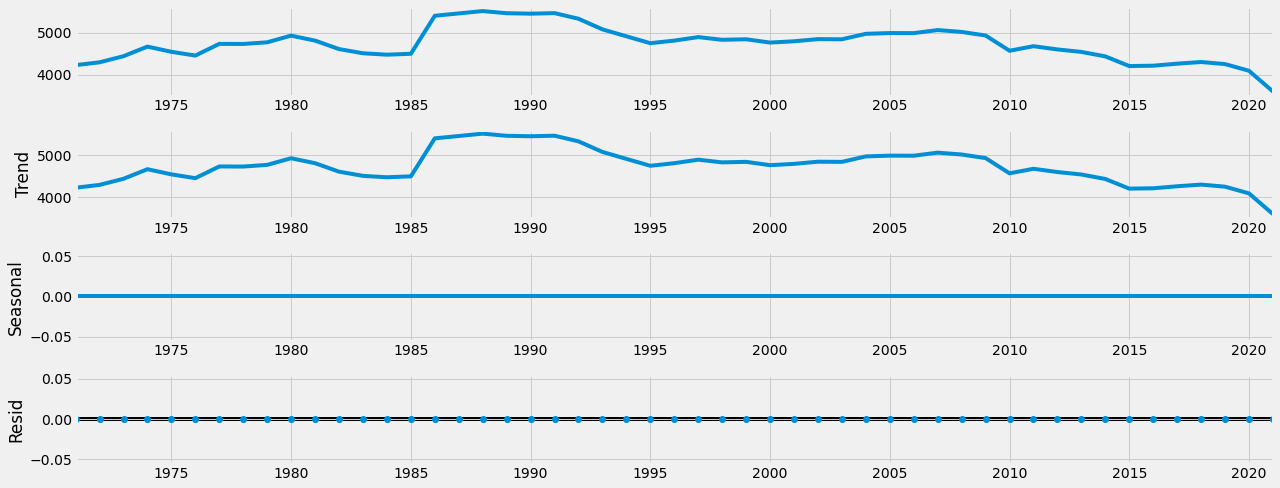

In [134]:
# Plot the separate components

decomposition_addition.plot()
plt.show()

#### 5.2 Decompotion: Multiplicative Model method

In [135]:
# Decompose the time series using an multiplicative model

decomposition_multi = sm.tsa.seasonal_decompose(df_sub, model='multiplicative') 

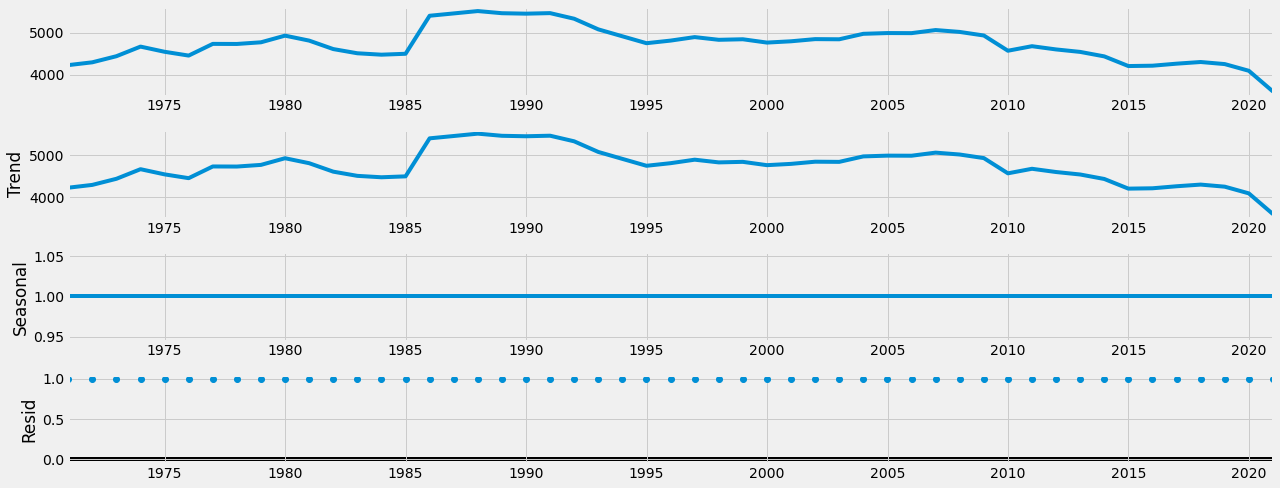

In [136]:
# Plot the separate components

decomposition_multi.plot()
plt.show()

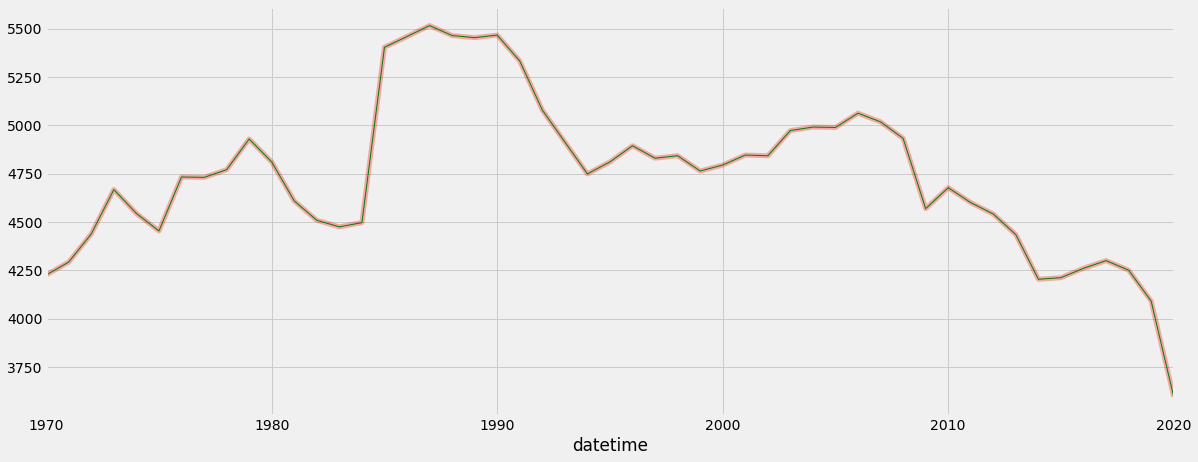

In [137]:
# Evaluating trends component from both models

decomposition_adi.trend.plot(color='red', linewidth=5, alpha=0.3)
decomposition_multi.trend.plot(color='green', linewidth=1)
plt.show()

#### From the both plots, the additive and multiplicative model create same pattern of trend and seasonality but i believe that the data behaves more exponentially.

### 6. Testing for stationarity

In [138]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.716529
p-value                         0.842422
Number of Lags Used             0.000000
Number of Observations Used    50.000000
Critical Value (1%)            -3.568486
Critical Value (5%)            -2.921360
Critical Value (10%)           -2.598662
dtype: float64


First is your test statistic, which is the direct result of the statistical test—this is your most important value. Below this is the p-value, which indicates whether the test result is significant. A “significant” result would be a p-value of less than 0.05.If the test statistic is larger than the critical value, you can’t reject the null hypothesis. If the test statistic is smaller, then you can reject the null hypothesis. As you’re hoping to disprove your null hypothesis, the latter scenario is what i am hoping for therefor

H0 = Unit root present (non-stationary)  
HA = Unit root not present (stationary)

 - If test statistic larger than critical value = can’t reject null hypothesis.
 - If test statistic smaller than critical value = can reject null hypothesis

 - Using significance level of 5%, the critical Value is -2.921 While, this is much smaller than the test statistic, which is -0.738876, which means that you can’t reject the null hypothesis.This means that there is a unit root in our data, and our data is non-stationary.
 
 - The p-value indicates whether the test result is significant and for that to happen, A “significant” result would be a p-value of less than 0.05 but in case it is also larger than 0.05.

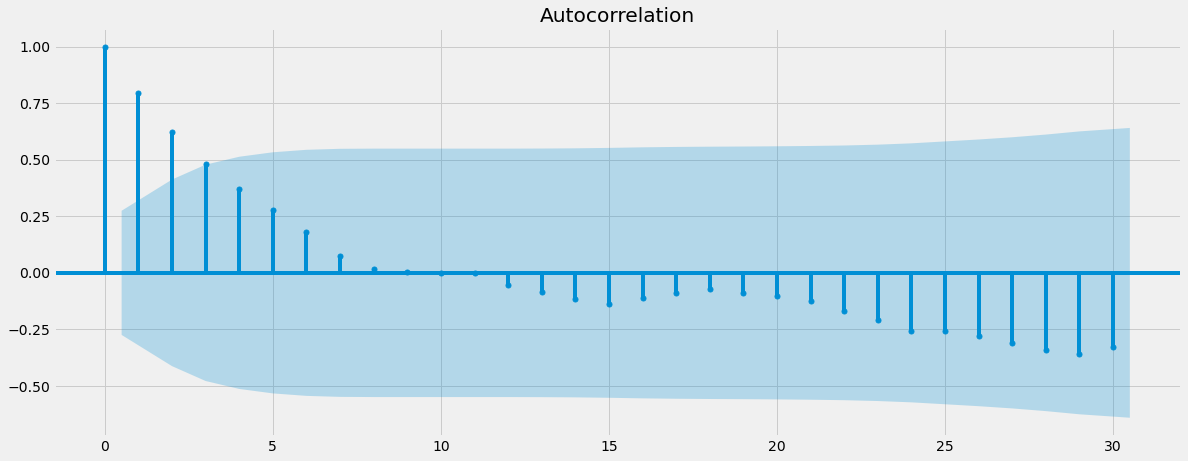

In [139]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_sub, lags=30)
plt.show()

In [140]:
autocorr = acf(df_sub, alpha=0.05)

In [141]:
autocorr 

(array([ 1.        ,  0.79318351,  0.62340681,  0.48003597,  0.3704567 ,
         0.27938891,  0.178921  ,  0.07531287,  0.01783913,  0.00218996,
        -0.00133152, -0.00147692, -0.05205336, -0.0830377 , -0.11675657,
        -0.13707776, -0.1134151 , -0.09008109, -0.07255586, -0.08825024,
        -0.10223899, -0.12434643, -0.16722545, -0.20968346, -0.25488566,
        -0.25692853, -0.27897902, -0.30955402, -0.33922198, -0.35816536,
        -0.32932856, -0.28066849, -0.24328426, -0.21402057, -0.15616295,
        -0.0929291 ,  0.02535406,  0.03839751,  0.04585304,  0.04993136,
         0.02897521]),
 array([[ 1.        ,  1.        ],
        [ 0.51873366,  1.06763337],
        [ 0.21097522,  1.03583839],
        [ 0.00186648,  0.95820546],
        [-0.1427294 ,  0.8836428 ],
        [-0.25355975,  0.81233757],
        [-0.3649479 ,  0.7227899 ],
        [-0.47297168,  0.62359743],
        [-0.53122409,  0.56690234],
        [-0.54691691,  0.55129684],
        [-0.55043905,  0.54777601

- The vertical lines represent the lags in the series, while the blue area represents the confidence interval. As we can see, most of lags go below the blue edge of the confidence interval. This means we have lags that are significantly non-correlated with each other.
-  In other words, data is non-stationary which supports the result of the Dickey-Fuller 

### 5. Stationarizing the Data

In [142]:
df_diff = df_sub - df_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [143]:
df_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [144]:
df_diff.head()

,Value
datetime,
1971-12-31,67.114915
1972-12-31,145.746897
1973-12-31,228.736339
1974-12-31,-123.311153
1975-12-31,-90.637936


In [145]:
df_diff.columns

Index(['Value'], dtype='object')

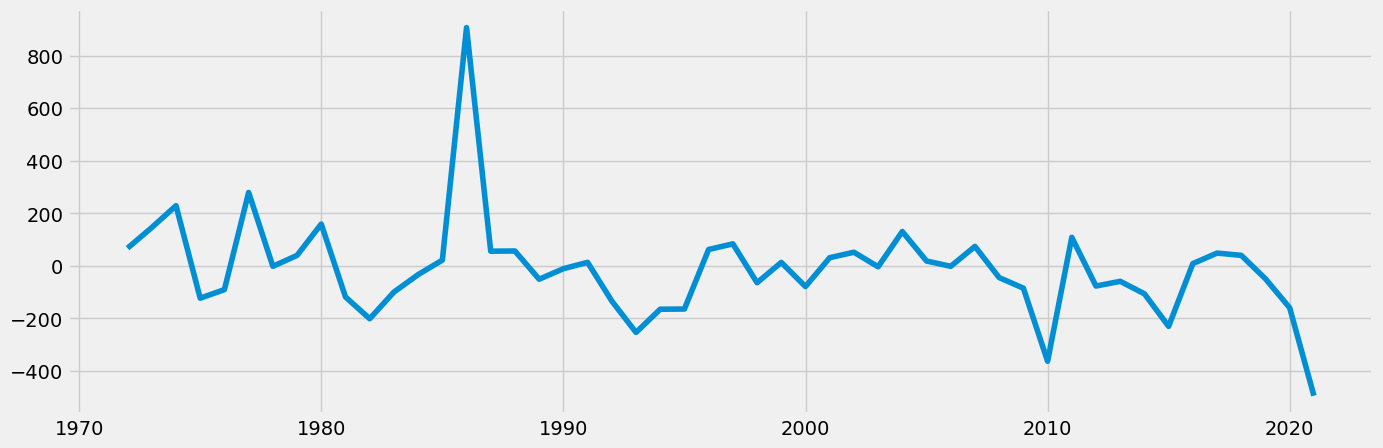

In [146]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_diff)

In [147]:
dickey_fuller(df_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.250987
p-value                         0.000007
Number of Lags Used             0.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


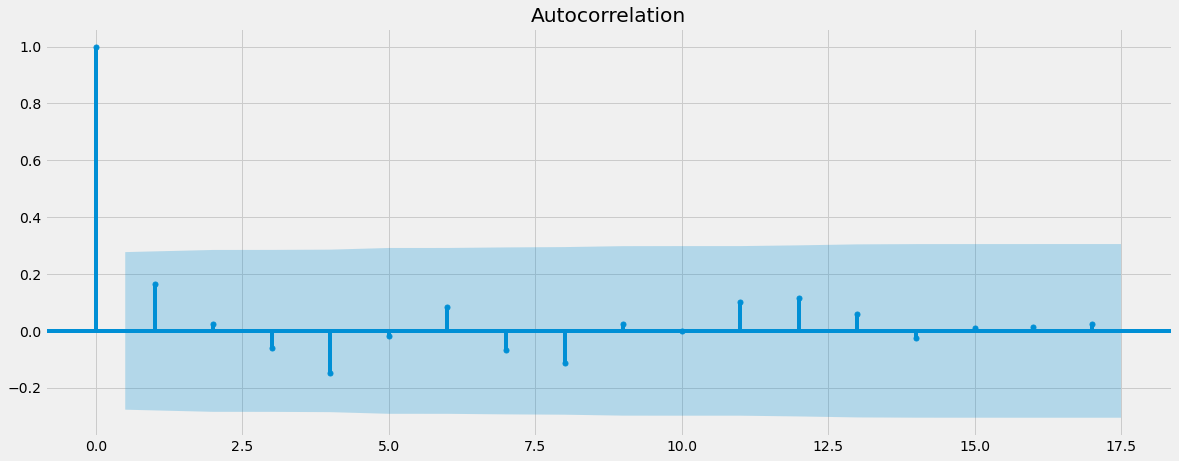

In [148]:
plot_acf(df_diff)
plt.show()

-  Our test statistic is now smaller than the critical value at both the five and ten percent significance levels. You also have a satisfactory p-value (p<0.05). This means i can reject the null hypothesis and, as a result, consider your series stationary.